# Network Measures

In [2]:
library(statnet)

In [3]:
nl <- read.table('../grey_nodes.tsv', sep="\t", header=T, quote="\"",
                    stringsAsFactors=F, strip.white=T, as.is=T)

In [4]:
adj<-as.matrix(read.table(('../grey_adjacency_mod.tsv'), sep="\t",
                             header=T, row.names=1, quote="\""))

In [5]:
net <- network(adj, vertex.attr=nl, vertex.attrnames=colnames(nl),
                  directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

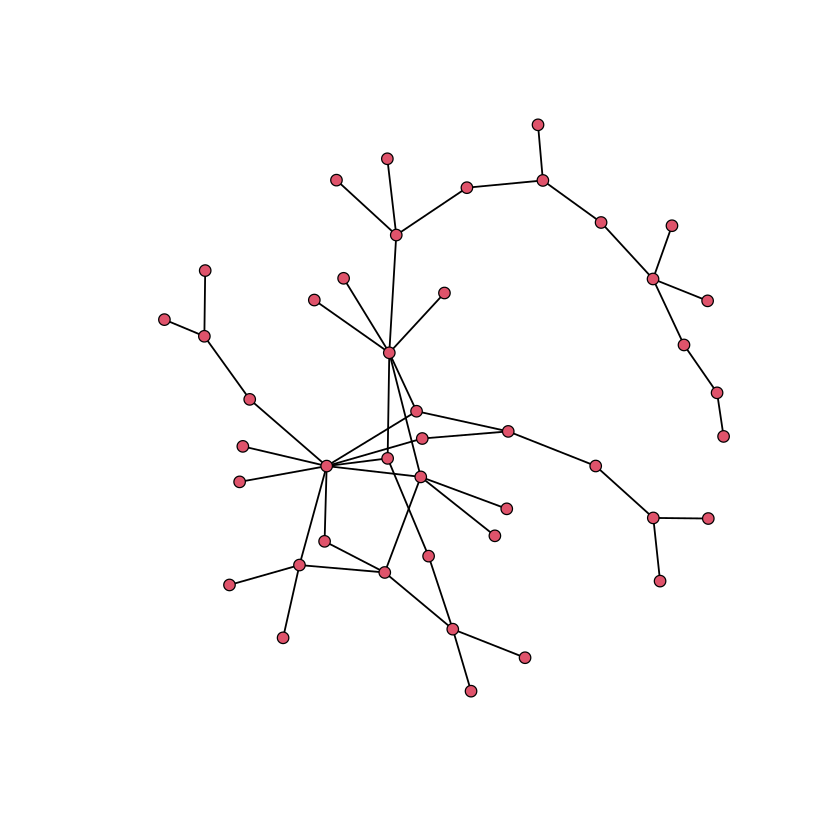

In [6]:
plot(net)

In [7]:
net

 Network attributes:
  vertices = 44 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 49 
    missing edges= 0 
    non-missing edges= 49 

 Vertex attribute names: 
    birthyear name position race season sex sign vertex.names 

No edge attributes

## Degree

In [8]:
degree(net, gmode="graph")

[1] 3 1 4 1 1 1 3 3 2 1 1 4 2 1 2 2 1 4 1 1 4 9 2 3 1 2 3 1 1 1 2 4 2 1 1 1 1 7
[39] 1 1 2 5 1 3

In [9]:
nl$Degree <- degree(net, gmode="graph")

In [10]:
head(nl)

,name,sex,race,birthyear,position,season,sign,Degree
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
1,addison,F,White,1967,Attending,1,Libra,3
2,adele,F,Black,1949,Non-Staff,2,Leo,1
3,altman,F,White,1969,Attending,6,Pisces,4
4,amelia,F,White,1981,Attending,7,Libra,1
5,arizona,F,White,1976,Attending,5,Leo,1
6,ava,F,White,1975,Non-Staff,3,Gemini,1


## Centralities

In [11]:
nl$BetweenCent <- betweenness(net, gmode="graph")

In [12]:
nl$CloseCent <- closeness(net, g=4, gmode="graph")

In [13]:
nl$CloseCentMOD <- closeness(net, g=3, gmode="graph")

In [14]:
nl$evcent<-evcent(net, gmode='graph', maxiter=500, use.eigen=TRUE)

In [15]:
head(nl)

,name,sex,race,birthyear,position,season,sign,Degree,BetweenCent,CloseCent,CloseCentMOD,evcent
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,addison,F,White,1967,Attending,1,Libra,3,132.9167,0.2828947,0.2828947,-0.2572787243
2,adele,F,Black,1949,Non-Staff,2,Leo,1,0.0000,0.1369427,0.1369427,-0.0003082846
3,altman,F,White,1969,Attending,6,Pisces,4,393.0000,0.2687500,0.2687500,-0.1182065456
4,amelia,F,White,1981,Attending,7,Libra,1,0.0000,0.2336957,0.2336957,-0.0916504636
5,arizona,F,White,1976,Attending,5,Leo,1,0.0000,0.2263158,0.2263158,-0.0932937379
6,ava,F,White,1975,Non-Staff,3,Gemini,1,0.0000,0.2216495,0.2216495,-0.1391660905


## Triads

number of complete triads

In [16]:
gtrans(net)

[1] 0

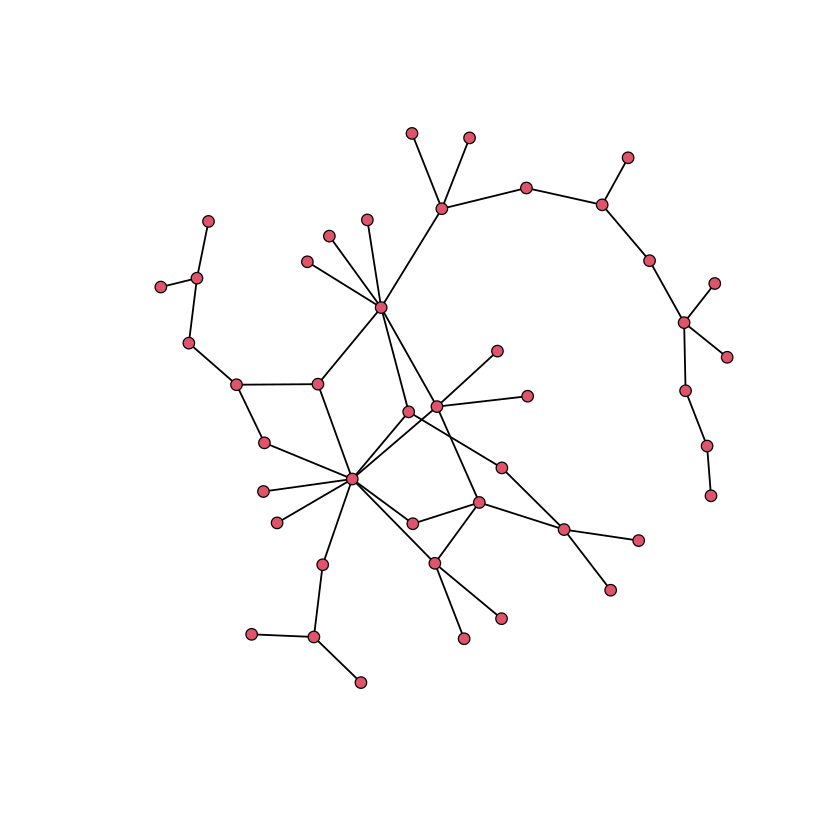

In [17]:
plot(net)

triad types  
003  A, B, C, empty triad.  
012  A->B, C   
102  A<->B, C    
021D A<-B->C   
021U A->B<-C   
021C A->B->C  
111D A<->B<-C  
111U A<->B->C  
030T A->B<-C, A->C  
030C A<-B<-C, A->C.  
201  A<->B<->C.  
120D A<-B->C, A<->C.  
120U A->B<-C, A<->C.  
120C A->B->C, A<->C.  
210  A->B<->C, A<->C.  
300  A<->B<->C, A<->C, completely connected.  

In [18]:
triad.census(net, mode = "digraph")

003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
11310,0,1810,0,0,0,0,0,0,0,124,0,0,0,0,0


## Cliques

In [19]:
cliques <- clique.census(net, mode = "graph", clique.comembership = "sum")

number of cliques with different sizes

In [20]:
cliques$clique.count

,Agg,addison,adele,altman,amelia,arizona,ava,avery,bailey,ben,⋯,pierce,preston,reed,sloan,steve,susan.grey,thatch.grey,torres,tucker,yang
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,49,3,1,4,1,1,1,3,3,2,⋯,1,1,1,7,1,1,2,5,1,3


co-member matrix

In [21]:
head(cliques$clique.comemb)

,addison,adele,altman,amelia,arizona,ava,avery,bailey,ben,burton,⋯,pierce,preston,reed,sloan,steve,susan.grey,thatch.grey,torres,tucker,yang
addison,3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
adele,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
altman,0,0,4,0,0,0,0,0,0,1,⋯,0,0,0,1,0,0,0,0,0,0
amelia,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
arizona,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
ava,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


all found cliques

In [22]:
cliques$cliques

[[1]]
NULL

[[2]]
[[2]][[1]]
[1] 40 41

[[2]][[2]]
[1] 38 42

[[2]][[3]]
[1]  1 38

[[2]][[4]]
[1] 37 38

[[2]][[5]]
[1] 36 44

[[2]][[6]]
[1] 30 38

[[2]][[7]]
[1] 22 42

[[2]][[8]]
[1] 31 32

[[2]][[9]]
[1] 22 31

[[2]][[10]]
[1] 22 29

[[2]][[11]]
[1] 27 35

[[2]][[12]]
[1] 27 28

[[2]][[13]]
[1] 26 27

[[2]][[14]]
[1] 22 26

[[2]][[15]]
[1] 22 24

[[2]][[16]]
[1] 22 23

[[2]][[17]]
[1]  1 22

[[2]][[18]]
[1] 20 21

[[2]][[19]]
[1] 19 42

[[2]][[20]]
[1] 18 39

[[2]][[21]]
[1] 32 42

[[2]][[22]]
[1] 18 32

[[2]][[23]]
[1] 15 18

[[2]][[24]]
[1] 17 18

[[2]][[25]]
[1] 21 32

[[2]][[26]]
[1] 21 22

[[2]][[27]]
[1] 14 21

[[2]][[28]]
[1] 11 12

[[2]][[29]]
[1]  8 43

[[2]][[30]]
[1]  8 25

[[2]][[31]]
[1] 8 9

[[2]][[32]]
[1] 24 38

[[2]][[33]]
[1]  7 24

[[2]][[34]]
[1]  7 23

[[2]][[35]]
[1] 7 9

[[2]][[36]]
[1]  6 22

[[2]][[37]]
[1]  5 42

[[2]][[38]]
[1]  4 38

[[2]][[39]]
[1]  3 38

[[2]][[40]]
[1]  3 34

[[2]][[41]]
[1] 33 44

[[2]][[42]]
[1]  3 33

[[2]][[43]]
[1]  3 10

[[2]][[44]]
[1] 16 41

[[2]][[45]]
[1] 12 16

[[2]][[46]]
[1] 13 44

[[2]][[47]]
[1] 12 13

[[2]][[48]]
[1]  2 12

[[2]][[49]]
[1]  1 15

## Components

In [23]:
components(net, connected="strong")

[1] 1

In [24]:
components(net, connected="weak")

[1] 1

In [25]:
comp <- component.dist(net, connected="strong")

In [26]:
comp$membership

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1

In [27]:
comp$csize

[1] 44

In [28]:
comp$cdist

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 1

which nodes increase components if removed

In [29]:
cutpoints(net, connected="strong")

[1]  3  7  8  9 12 13 16 18 21 22 26 27 33 38 41 42 44